C:\Users\melte\AppData\Local\Temp\ipykernel_22824\224452774.py:110: RuntimeWarning: divide by zero encountered in log10
  plt.plot(range(1, n + 1), np.log10(romberg_errors), label='Romberg-Quadratur')


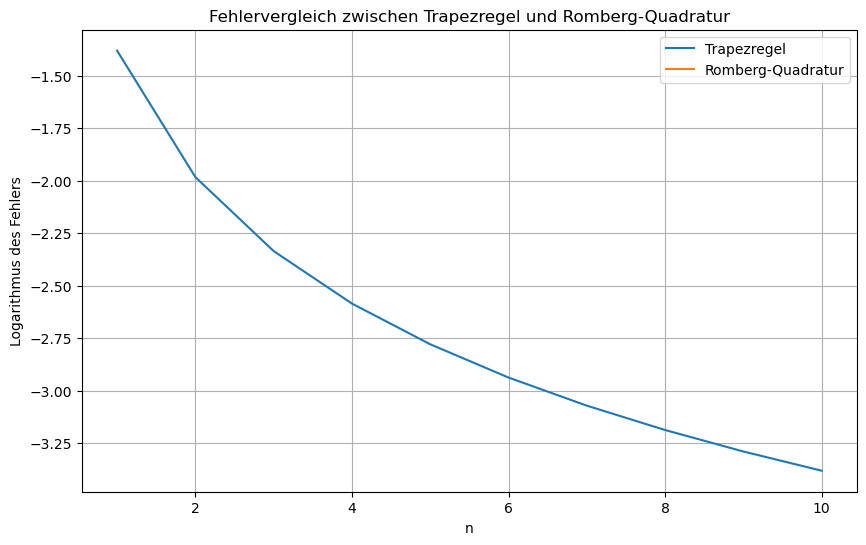

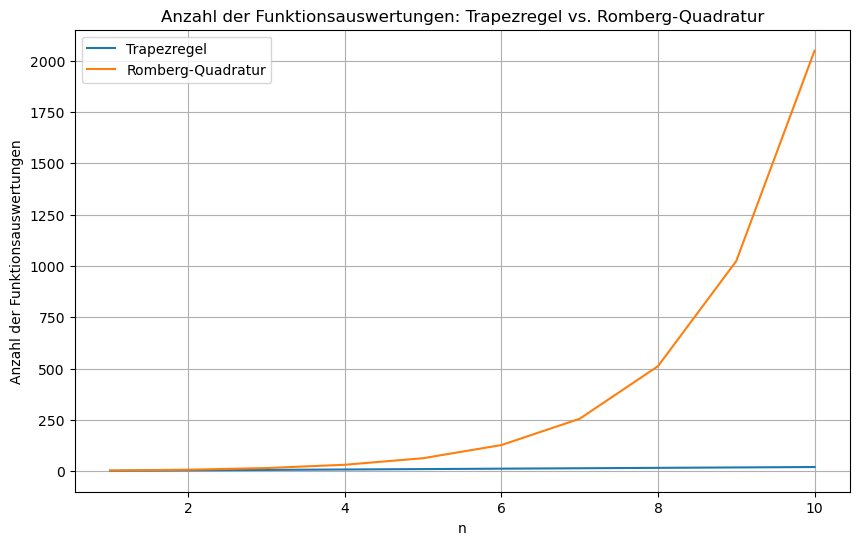

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# (a) Implementierung der summierten Trapezregel
def trapez(f, a, b, n):
    """
    Berechnet die Approximation des Integrals einer Funktion f über [a,b] mittels der summierten Trapezregel mit 2n + 1 äquidistanten Stützstellen.
    
    Args:
        f: Funktion, die integriert werden soll.
        a: Untere Grenze des Integrationsintervalls.
        b: Obere Grenze des Integrationsintervalls.
        n: Anzahl der Unterintervalle (die Anzahl der Stützstellen beträgt 2n + 1).
        
    Returns:
        Die Approximation des Integrals.
    """
    h = (b - a) / (2 * n)
    x = np.linspace(a, b, 2 * n + 1)
    y = f(x)
    T = h * (y[0] + 2 * np.sum(y[1:-1]) + y[-1]) / 2
    return T

# (b) Implementierung der Romberg-Extrapolation
def romberg(f, a, b, n):
    """
    Berechnet die Approximation des Integrals einer Funktion f über [a,b] mittels Romberg-Extrapolation.
    
    Args:
        f: Funktion, die integriert werden soll.
        a: Untere Grenze des Integrationsintervalls.
        b: Obere Grenze des Integrationsintervalls.
        n: Ordnung der Romberg-Extrapolation.
        
    Returns:
        Die Approximation des Integrals.
    """
    R = np.zeros((n + 1, n + 1))
    for k in range(n + 1):
        R[k, 0] = trapez(f, a, b, 2 ** k)
    for i in range(1, n + 1):
        for k in range(n + 1 - i):
            R[k, i] = (4 ** i * R[k + 1, i - 1] - R[k, i - 1]) / (4 ** i - 1)
    return R[0, n]

# (c) Anzahl der Funktionsauswertungen
def func_eval_trapez(n):
    """
    Berechnet die Anzahl der Funktionsauswertungen für die Trapezregel in Abhängigkeit von n.
    
    Args:
        n: Anzahl der Unterintervalle.
        
    Returns:
        Anzahl der Funktionsauswertungen.
    """
    return 2 * n + 1

def func_eval_romberg(n):
    """
    Berechnet die Anzahl der Funktionsauswertungen für die Romberg-Extrapolation in Abhängigkeit von n.
    
    Args:
        n: Ordnung der Romberg-Extrapolation.
        
    Returns:
        Anzahl der Funktionsauswertungen.
    """
    return 1 + sum(2 ** k for k in range(n + 1))

# (d) Vergleich der Methoden
def integral_error(f, a, b, n, true_value):
    """
    Berechnet die Fehler der Trapezregel und Romberg-Extrapolation im Vergleich zum wahren Wert des Integrals.
    
    Args:
        f: Funktion, die integriert werden soll.
        a: Untere Grenze des Integrationsintervalls.
        b: Obere Grenze des Integrationsintervalls.
        n: Maximaler Wert für die Anzahl der Unterintervalle bzw. die Ordnung der Romberg-Extrapolation.
        true_value: Der wahre Wert des Integrals.
        
    Returns:
        Listen der Fehler der Trapezregel und Romberg-Extrapolation.
    """
    trapez_errors = []
    romberg_errors = []
    for i in range(1, n + 1):
        trapez_result = trapez(f, a, b, i)
        romberg_result = romberg(f, a, b, i)
        trapez_errors.append(np.abs(trapez_result - true_value))
        romberg_errors.append(np.abs(romberg_result - true_value))
    return trapez_errors, romberg_errors

# Funktion f(x) = 1 - x^2
def f(x):
    return 1 - x ** 2

# Berechnung des Integrals von 0 bis 1
a, b = 0, 1
true_value, _ = spi.quad(f, a, b)
n = 10

# Fehleranalyse und Plot
trapez_errors, romberg_errors = integral_error(f, a, b, n, true_value)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), np.log10(trapez_errors), label='Trapezregel')
plt.plot(range(1, n + 1), np.log10(romberg_errors), label='Romberg-Quadratur')
plt.xlabel('n')
plt.ylabel('Logarithmus des Fehlers')
plt.legend()
plt.title('Fehlervergleich zwischen Trapezregel und Romberg-Quadratur')
plt.grid(True)
plt.show()

# Anzahl der Funktionsauswertungen plotten
trapez_evals = [func_eval_trapez(i) for i in range(1, n + 1)]
romberg_evals = [func_eval_romberg(i) for i in range(1, n + 1)]

plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), trapez_evals, label='Trapezregel')
plt.plot(range(1, n + 1), romberg_evals, label='Romberg-Quadratur')
plt.xlabel('n')
plt.ylabel('Anzahl der Funktionsauswertungen')
plt.legend()
plt.title('Anzahl der Funktionsauswertungen: Trapezregel vs. Romberg-Quadratur')
plt.grid(True)
plt.show()
